In this note, I am going to giva a famous exapmle to give some information about the pymc3 library. 

Obviously, first I have to import libraries!:

In [1]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import arviz as az

In this example, I suppose that someone! flipped a coin 3 times and observed 2 heads (which is success). So, my goal is to find the best value for "p":

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 3 seconds.


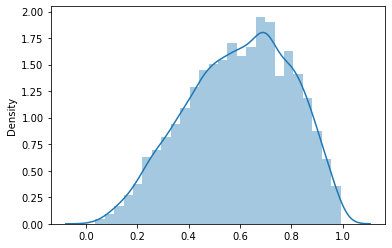

Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.6,0.2,0.23,0.94,0.01,0.0,1396.07,2187.91,1.0


In [2]:
with pm.Model():
    p = pm.Uniform('p',0,1) # in this line, I defined my prior which can be any number between 0 , 1
    likelihood = pm.Binomial('likelihood',n=3,p=p,observed = 2) # observed 2 success (2 heads) in 3 flippings
    trace = pm.sample(2000) # you can choose your sampling pipeline here, but pymc3 will pick the best method according to your problem
sns.distplot(trace['p'])
plt.show()
az.summary(trace,round_to=2) # round_to: number of decimals

As you can see, p = 0.6 is the best fit for our problem.

In the following,I want to make the problem a bit harder! For this, I will start with 1 flip up to 6 ones. in each iteration, I consider a different observed quantity. Interestingly, due to equall observations of head and tail, you will see that the best fit for p will be 0.5:

Sequential sampling (2 chains in 1 job)
Metropolis: [prior]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 6 seconds.
The number of effective samples is smaller than 25% for some parameters.
Sequential sampling (2 chains in 1 job)
Metropolis: [prior]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 6 seconds.
The number of effective samples is smaller than 25% for some parameters.
Sequential sampling (2 chains in 1 job)
Metropolis: [prior]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 6 seconds.
The number of effective samples is smaller than 25% for some parameters.
Sequential sampling (2 chains in 1 job)
Metropolis: [prior]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 6 seconds.
The number of effective samples is smaller than 25% for some parameters.
Sequential sampling (2 chains in 1 job)
Metropolis: [prior]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 6 seconds.
The number of effective samples is smaller than 25% for some parameters.
Sequential sampling (2 chains in 1 job)
Metropolis: [prior]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 6 seconds.
The number of effective samples is smaller than 25% for some parameters.


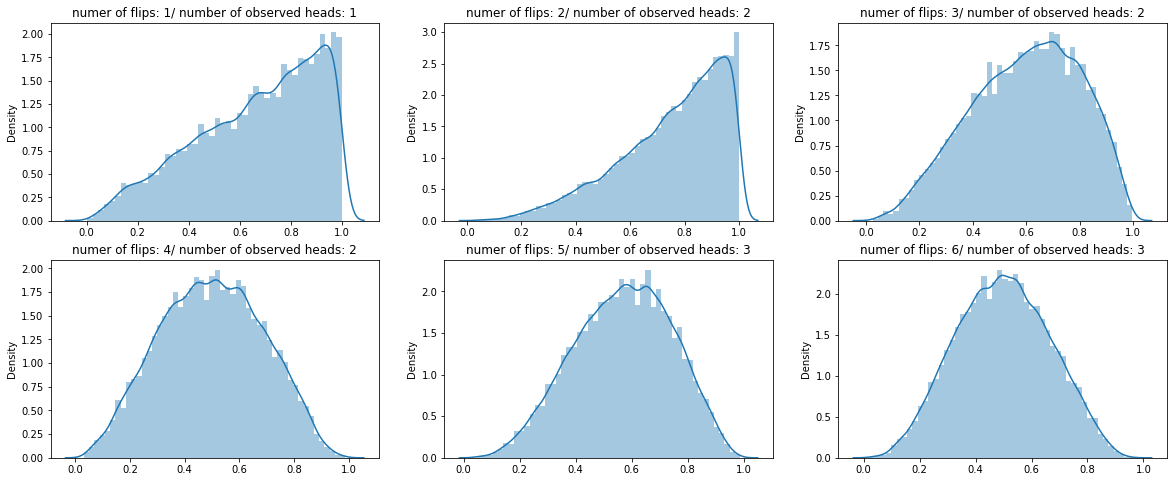

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [6]:
# MESALE 3KE BARAYE 6 HALAT
num = 1
r = 0
t = 0
v = 0
a = [1,1,0,0,1,0]
fig , axes = plt.subplots(2,3,figsize=(20,8))
for i in a:
    plt.figure(figsize=(20,10))
    r = r + i
    with pm.Model():
        prior = pm.Uniform('prior',0,1)
        likelihood = pm.Binomial('returns',n=num,p=prior,observed = r) 
    
        step = pm.Metropolis() # Here I decided to choose metropolis pipeline
        trace = pm.sample(20000,step)
        sns.distplot(trace['prior'] , ax = axes[v,t])
        axes[v,t].set_title("numer of flips: {}/ number of observed heads: {}".format(num,r))
        t = t + 1
        num = num + 1
        if t == 3:
          t = 0
          v = 1

plt.show()